In [14]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# import data
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Show me the shape and type of the data
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [8]:
# Show me the range of the data
X_train_full.min(), X_train_full.max()

(0, 255)

In [9]:
# Rescale the inputs to be in the interval [-0.5,0.5], 
# this should learn better, since initialization 
# of parameters usually starts with small values 
# (e.g., standard normal).

X_train_full = X_train_full/255 - 0.5  # Rescale the training set input
X_test = X_test/255  - 0.5   # Apply the same transform to the test set

In [10]:
# make a validation split beyond the basic test/train
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  test_size=0.2, 
                                                  random_state=42)

In [11]:
# build the model

model = keras.models.Sequential()  # simplest model: a stack of layers
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Flatten images
model.add(keras.layers.Dense(300, activation="relu")) # Dense layer 
                                   # with 300 neurons (300 outputs)
model.add(keras.layers.Dense(100, activation="relu")) # Dense layer 
                                   # with 100 neurons.
model.add(keras.layers.Dense(10, activation="softmax")) # Dense layer
                                   # with 10 outputs, using
                                   # softmax because this is 
                                   # a multiclass classification

2022-03-29 21:59:20.246599: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-29 21:59:20.246684: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wit): /proc/driver/nvidia/version does not exist
2022-03-29 21:59:20.248047: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
## Learning rate with decay
## decay works as   lr *= (1. / (1. + decay * iterations))

learning_rate=0.02  # step this far in the direction of - gradient (down)
decay = 1e-4        # adjust how learning rate gets smaller over time


## Optimizer
opt = tf.keras.optimizers.SGD(lr = learning_rate,
                           decay = decay,
                           momentum = 0.8, 
                           nesterov=False)

## Consider also experimenting with Adam as a replacement for SGD:

#opt = keras.optimizers.Adam(lr=learning_rate)



/home/caelan/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
# Compile the model 

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

## We use sparse cross entropy because 
## categorical labels => sparse one-hot encoding


In [10]:
# Train the model
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_val, y_val)
                   )

# Note that batch_size defaults to 32 if not specified


Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5102 - accuracy: 0.8130 - val_loss: 0.4057 - val_accuracy: 0.8516
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3789 - accuracy: 0.8606 - val_loss: 0.3687 - val_accuracy: 0.8646
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3329 - accuracy: 0.8764 - val_loss: 0.3417 - val_accuracy: 0.8745
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3061 - accuracy: 0.8879 - val_loss: 0.3281 - val_accuracy: 0.8814
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2846 - accuracy: 0.8938 - val_loss: 0.3208 - val_accuracy: 0.8843
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.9010 - val_loss: 0.3158 - val_accuracy: 0.8833
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2511 - accuracy: 0.9068 - val_loss: 0.3041 - val_accuracy:

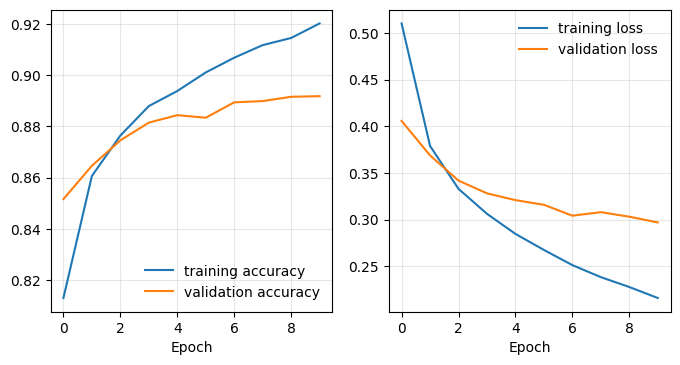

In [11]:
# Plot the history
plt.figure(figsize=(8,4),dpi=100)

ax = plt.subplot(1,2,1)
ax.plot(history.history['accuracy'], label='training accuracy')
ax.plot(history.history['val_accuracy'], label='validation accuracy')
ax.grid(True, alpha=0.2)
ax.legend(frameon=False)
ax.set_xlabel('Epoch')
ax.grid(True, alpha=0.3)

ax = plt.subplot(1,2,2)
ax.plot(history.history['loss'], label='training loss')
ax.plot(history.history['val_loss'], label='validation loss')
ax.legend(frameon=False)
ax.set_xlabel('Epoch')
ax.grid(True, alpha=0.3)
#plt.ylim(0,1);

# Experiment

Play with the various choices in the previous model to find the combination with the best validation accuracy, the combination that converges the fastest, and so forth.  Remember that doing this corresponds to _learning on the validation set_ sort of a hybrid between machine learning and human (you) learning.  So your final result could be overfit—that's why we need a separate test set.

# Check the test set

In [12]:
## Evaluate your model on the actual test set:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 868us/step - loss: 0.3247 - accuracy: 0.8848


[0.3247297406196594, 0.8848000168800354]

# Check it yourself

It's a good ideal to check yourself that the model has fit well

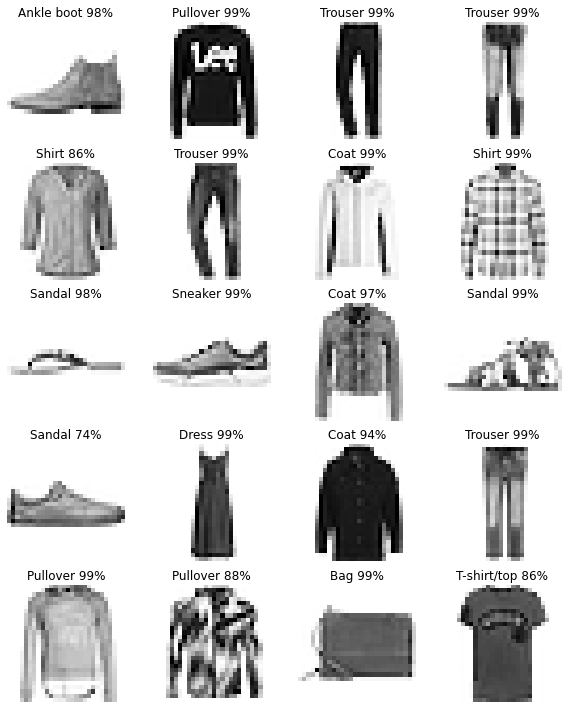

In [13]:
## visually inspect the model predictions for the test set


# add human labels to the clothing classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# select a subset to look at.
n = 20  # look at this many predictions
X_new = X_test[:n]
probs=model.predict(X_new)

# Plot
cols = 4              # How many columns in the plot
rows = (len(X_new)+cols-1)//cols  # deduce the number of rows
plt.figure(figsize=(cols*2.5,rows*2.5)) #set

for i,x in enumerate(X_new):           # Make each plot
    ax = plt.subplot(rows,cols,i+1)
    ax.imshow(x, cmap='Greys')         # plot the picture
    best_guess = np.argmax(probs[i])   # identify the machine prediction
    best_prob = int(probs[i][best_guess] * 100)  
    ax.set_title(class_names[best_guess]+' {}%'.format(best_prob)) #label the plot
    ax.axis('off')